In [1]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib import gridspec
from matplotlib import rcParams
from scipy.optimize import curve_fit
import scipy.stats as stats
from matplotlib import lines
import seaborn as sns
plt.rcParams['pdf.fonttype'] = 42 # to be able to change text in pdf opened with illustrator
plt.rcParams['ps.fonttype'] = 42
#import scipy.stats as stats
from statsmodels.stats import multicomp 
from scipy import stats
import dabest

import pandas as pd
import glob

import tkinter as tk
from tkinter import filedialog#to open dialog box to choose file
from tkinter.filedialog import askopenfilename

/Users/wormsenselab/anaconda3/envs/dabest/lib/python3.7/site-packages/matplotlib/__init__.py:1003: UserWarning: Duplicate key in file "/Users/Fechner/.matplotlib/matplotlibrc", line #3
  (fname, cnt))
/Users/wormsenselab/anaconda3/envs/dabest/lib/python3.7/site-packages/matplotlib/__init__.py:1003: UserWarning: Duplicate key in file "/Users/Fechner/.matplotlib/matplotlibrc", line #4
  (fname, cnt))


In [2]:
# Add heka_reader to PYTHONPATH
import sys
fpath = '/Users/Fechner/PythonStuff/heka_reader'
sys.path.append(fpath)

### switch to my directory and check if I am in the correct directory

In [3]:
cd ~/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/AnalysisNterm


/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/AnalysisNterm


## Ratio plots are a result of the Matlab script TEVCAnalyzeLoopSTFX.m found on github analyzing mean values of 3 recordings for several conditions 

https://github.com/sfechner/AnalysisFunction/tree/master/TEVC

In [4]:
filedir ='/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/AnalysisNterm/'
filedirExportFig ='/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/AnalysisNterm/FiguresFromNotebook/'
# filedirManuscript ='/Users/Fechner/Dropbox/ManuscriptFechnerPharmacology/Figures/ExportedFromNotebook/'
# filedirManuscriptStat ='/Users/Fechner/Dropbox/ManuscriptFechnerPharmacology/Statistics/'

#CHANGE USER NAME ON PRIVATE LAPTOP TO Fechner or be more clever about the Filename

#root = tk.Tk()
#root.withdraw() not sure if necessary, description to avoid opening full gui

#either choose a cetain file or open dialog box
#certain file
#filename = 'RatioNterm-20201026.xlsx'




In [5]:
filenameRatio = '/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/RatioSTFX/'

In [6]:
listofFiles = ['099','100','101','102','103','104','105','106','107','108','109','110','111','112']

### load all ratio files one by one and append them to one dataframe. save the new dataframe of all recordings from listofFiles into a csv files

In [7]:
df = pd.DataFrame()

for i in range(len(listofFiles)):
    df_temp = pd.read_csv(filenameRatio+'RatioDeltaTEVC-STFX'+listofFiles[i]+'.txt', sep="," )
    df = df.append(df_temp,ignore_index=True)

df.to_csv(filedir+'RatioNterm-.csv', header=True, index=None, sep=',', mode='w')    

### display dataframe (there is an error in the Date exported from Matlab, it's not used in the analysis)

In [8]:
# df = xl.parse("Sheet1",converters={'CultivationSol': str}) #calls for Sheet names 
df['RATIO'] = pd.to_numeric(df['RATIO'], errors='coerce')
df.head()

,Date,CellIDRec,Injection,CultivationSol,DaysPostInj,Rating,StartSol,TestSol,MeanSTART,MeanTEST,DELTA,RATIO,VrevSTART,VrevTEST,DELTAVrev
0,갈,STFX099006,mg735mg012,L-15(300Amil),4,2.5,NaGluSel1,NaGluSelAmil300,-2.493531e-07,-2.200904e-07,2.926278e-08,0.882645,-0.035196,-0.037889,-0.002693
1,갈,STFX099006,mg735mg012,L-15(300Amil),4,2.5,NaGluSelAmil300,NaGluSel2,-2.200904e-07,-3.173245e-07,-9.723412e-08,1.441792,-0.037889,-0.028605,0.009284
2,갈,STFX099009,mg737mg012,L-15(300Amil),4,2.0,NaGluSel1,NaGluSelAmil300,-7.911796e-07,-8.476202e-07,-5.644059e-08,1.071337,-0.015685,-0.014729,0.000956
3,갈,STFX099009,mg737mg012,L-15(300Amil),4,2.0,NaGluSelAmil300,NaGluSel2,-8.476202e-07,-8.204836e-07,2.713656e-08,0.967985,-0.014729,-0.015739,-0.001009
4,갈,STFX099012,mg734mg012,L-15(300Amil),4,2.5,NaGluSel1,NaGluSelAmil300,-2.176431e-07,-2.722699e-07,-5.462683e-08,1.250993,-0.026723,-0.022217,0.004506


### common axis parameters, variables used in plots later on

In [9]:
AxisTickLabelSize = 8
AxisLabelSize = 10
AxisLegendSize = 8
SizeOfMarker = 3
ErrorColor = 'red'

SizeOfMarker = 2
SizeofLine = 0.5

# Hard coding To DO: 
- Rename Mutations and plasmid Names
- determines which mutant to plot and in which order

## Define color of the plasmids, change color code here


In [10]:
#change color for regions here
RegionA = '#d7191C'
RegionB = '#fdae61'
RegionC = '#2c7bb6'
RegionNterm = '#ffffbf'
RegionABC = '#abd9e9'

#alternative colors for '#fdae61' and #abd9e9
#d7191C (rot), #ffffbf(eggshell),#2c7bb6 (blue)
#used colorbrewer for colorblind

### ReNameAlanin will plot all Alanin mutations and ReNameChimera all Chimera. you can modify the dictionary here to add or remove constructs, first entry is the abbreviation which will be used for legend labelling, name is the plasmid name. if the order of the plasmid name entry varies withing the dataframe due to an error in entering meta data, they won't appear in the analysis. It's probably good practice to check for "unique names" and check if there are spelling errors etc --> see quality control below. After creating df_Alanin300Amil below, you can ask df_Alanin300Amil.pivot(columns='Injection', values='TestSol').describe().T and this gives you a statistic of the "unique" constructs

In [11]:
ReNameAlanin ={'F84A':{'name':'mg738mg012','color':RegionA},# 
         'K85A':{'name':'mg739mg012','color':RegionA},
         'E86A':{'name':'mg740mg012','color':RegionA},
         'F87A':{'name':'mg741mg012','color':RegionA},
         'C88A':{'name':'mg748mg012','color':RegionA},
         'Y89A':{'name':'mg759mg012','color':RegionA}, 
         'K90A':{'name':'mg745mg012','color':RegionA}, 
         'T91A':{'name':'mg752mg012','color':RegionB},#B
         'S92A':{'name':'mg749mg012','color':RegionB},#B
         'ctr A93':{'name':'mg419mg012','color':RegionB},#B
         'H94A':{'name':'mg750mg012','color':RegionB},#B
         'G95A':{'name':'mg746mg012','color':RegionB},#B
         'I96A':{'name':'mg747mg012','color':RegionC},#C 
         'P97A':{'name':'mg760mg012','color':RegionC},#C 
         'M98A':{'name':'mg753mg012','color':RegionC}, #C   
         'I99A':{'name':'mg761mg012','color':RegionC},#C 
         'G100A':{'name':'mg751mg012','color':RegionC}#C      
        }

ReNameChimera={ #all constructs with M4d 
                'ctr A93':{'name':'mg419mg012','color':RegionB},
               'M4-NtermDT1':{'name':'mg755mg012','color':RegionNterm},
               'M4d-DT1ABC':{'name':'mg733mg012','color':RegionABC},
               'M4d-DT1A':{'name':'mg734mg012','color':RegionA},
               'M4d-DT1B':{'name':'mg735mg012','color':RegionB},
               'M4d-DT1C':{'name':'mg742mg012','color':RegionC},
               #heteromeric expression M4d and chimera M4d-DEGT1
                'M4+M4-DT1A':{'name':'mg419mg734mg012','color':RegionA},
               'M4+M4-DT1B':{'name':'mg419mg735mg012','color':RegionB},
               'M4+M4-DT1C':{'name':'mg419mg742mg012','color':RegionC},
                #all constructs with DEGT-1d
                #'DT1d':{'name':'mg418mg012','color':RegionB}, # no recordings in NaGluSel
                #'DT1-NtermM4':{'name':'mg756mg012','color':RegionB}, #not enough data
               #'DT1-M4ABC':{'name':'mg736mg012','color':RegionABC}, #not enough data (at least 3 needed)
               #'DT1-M4A':{'name':'mg737mg012','color':RegionA}, #not enough data
                #'DT1-M4B':{'name':'mg757mg012','color':RegionB},#not enough data
               'DT1-M4C':{'name':'mg758mg012','color':RegionC},
                #heteromeric expression M4d and chimera DT1d-M4C
               'M4+DT1-M4C':{'name':'mg419mg758mg012','color':RegionC},
        }
#print(ReNameAlanin)
LabelAlanin = list(ReNameAlanin.keys())
LabelChimera = list(ReNameChimera.keys())

# Input for df_current for Estimation plot

In [12]:
ListofAllAlanin = ['uninjected']
for i in range(len(ReNameAlanin)):
    ListofAllAlanin.append(ReNameAlanin[LabelAlanin[i]]['name'])
#print(ListofAllAlanin)

ListofAllChimera = ['uninjected']
for i in range(len(ReNameChimera)):
    ListofAllChimera.append(ReNameChimera[LabelChimera[i]]['name'])

# Re-Arrange Data Frame with All data with Test Solution 300 uM Amil
used in the Section Quality check

In [13]:
df_Alanin300Amil = df[(df.Injection.isin(pd.unique(ListofAllAlanin))) & (df.TestSol.isin(["NaGluSelAmil300"]))] 
df_Chimera300Amil = df[(df.Injection.isin(pd.unique(ListofAllChimera))) & (df.TestSol.isin(["NaGluSelAmil300"]))]

### to plot Alanine mutations by mean change in current, I sorted the constructs by the mean changein current to amiloride. To remove the ordered display, remove the last statement df_MeanAlanine = df_MeanAlanine.sort_values(by=['MeanDeltaAmil'])

In [14]:
MeanAlanine = {"Mutation":['uninjected'],"Injection":[],"MeanDeltaAmil":[]}


for element in range(len(ListofAllAlanin)):
    MeanAlanine["MeanDeltaAmil"].append(df_Alanin300Amil[df_Alanin300Amil.Injection.isin([ListofAllAlanin[element]])]['DELTA'].values.mean())
    MeanAlanine["Injection"].append(ListofAllAlanin[element]) 
    if element == len(LabelAlanin):
        break
    else:        
        MeanAlanine["Mutation"].append(LabelAlanin[element])

#print(MeanAlanine)
        
df_MeanAlanine = pd.DataFrame.from_dict(MeanAlanine)    

#this statement only if you want to sort the date my mean change in current
df_MeanAlanine = df_MeanAlanine.sort_values(by=['MeanDeltaAmil'])


#print(df_MeanAlanine)


## here I re-assign the Listof AllAlanin and label after being sorted for size in delta current

In [15]:
#comment this section out if you don't want to have the genes ordered by mean Amiloride sensitivity
ListofAllAlanin = df_MeanAlanine['Injection']
ListofAllAlanin = ListofAllAlanin.tolist()

LabelAlanin = df_MeanAlanine['Mutation']
LabelAlanin =LabelAlanin.drop(0)
LabelAlanin =LabelAlanin.tolist()

### Re-concatenat data (there is a problem if data are in concatenated file which are not in the column file, thus re-concatenating for plotting purpose)

# Re-Arrange Before and After Amiloride current all Alanin mutations

In [16]:
AllInjection =  pd.unique(ListofAllAlanin)
AllInjection = AllInjection.tolist()
              
TestSolution = pd.unique("NaGluSelAmil300")
TestSolution  = TestSolution.tolist()

df_new = pd.DataFrame()
results = {}

for Solelement in TestSolution: 
    for element in AllInjection:
        if df[(df.Injection.isin([element])) & (df.TestSol.isin([Solelement]))].empty == True:
            #print('sdsdsd')
            continue
        else: 
            #print('sol presetn')
            result = df[(df.Injection.isin([element])) & (df.TestSol.isin([Solelement]))]
            results[element] = result
            if len(results[element]) <= 2:
#                 print(results[element]["TestSol"] + '+' + results[element]["Injection"] + ' has less or equal to 2 recordings')
                continue
            else:
                df_new = pd.concat([df_new,results[element]["MeanSTART"].rename(element+"-"+Solelement).reset_index(drop=True),results[element]["MeanTEST"].rename(element+'+'+Solelement).reset_index(drop=True)],sort=False, axis=1)
            #print(len(results[element]))
        
df_newInuA_Bef_Alanine = df_new.astype(float)*1000000  
#
#print(df_newInuA["mg012-NaGluAmil300"])


# Re-Arrange Before and After Amiloride current all Chimera mutations

In [17]:
AllInjection =  pd.unique(ListofAllChimera)
AllInjection = AllInjection.tolist()
              
TestSolution = pd.unique("NaGluSelAmil300")
TestSolution  = TestSolution.tolist()

df_new = pd.DataFrame()
results = {}

for Solelement in TestSolution: 
    for element in AllInjection:
        if df[(df.Injection.isin([element])) & (df.TestSol.isin([Solelement]))].empty == True:
            #print('sdsdsd')
            continue
        else: 
            #print('sol presetn')
            result = df[(df.Injection.isin([element])) & (df.TestSol.isin([Solelement]))]
            results[element] = result
            if len(results[element]) <= 2:
#                 print(results[element]["TestSol"] + '+' + results[element]["Injection"] + ' has less or equal to 2 recordings')
                continue
            else:
                df_new = pd.concat([df_new,results[element]["MeanSTART"].rename(element+"-"+Solelement).reset_index(drop=True),results[element]["MeanTEST"].rename(element+'+'+Solelement).reset_index(drop=True)],sort=False, axis=1)
            #print(len(results[element]))
        
df_newInuA_Bef_Chimera = df_new.astype(float)*1000000  
#
#print(df_newInuA["mg012-NaGluAmil300"])



# Re-Arrange Change in Current to Amiloride All Single Alanin Mutants

In [18]:
AllInjection =  pd.unique(ListofAllAlanin)
AllInjection = AllInjection.tolist()
              
TestSolution = pd.unique("NaGluSelAmil300")
TestSolution  = TestSolution.tolist()

df_ChangeInCur = pd.DataFrame()
results = {}

for Solelement in TestSolution: 
    for element in AllInjection:
        if df[(df.Injection.isin([element])) & (df.TestSol.isin([Solelement]))].empty == True:
            #print('sdsdsd')
            continue
        else: 
            #print('sol presetn')
            result = df[(df.Injection.isin([element])) & (df.TestSol.isin([Solelement]))]
            results[element] = result
            if len(results[element]) <= 1:
#                 print(results[element]["TestSol"] + '+' + results[element]["Injection"] + ' has less or equal to 2 recordings')
                continue
            else:          
                df_ChangeInCur = pd.concat([df_ChangeInCur,results[element]["DELTA"].rename(element+"DELTA"+Solelement).reset_index(drop=True),],sort=False, axis=1)

df_ChangeInCuruA = df_ChangeInCur.astype(float)*1000000

#print(df_ChangeInCuruA['mg753mg012DELTANaGluSelAmil300'])

# Re-Arrange Change in Current to Amiloride All Single Chimera Mutants

In [19]:
AllInjection =  pd.unique(ListofAllChimera)
AllInjection = AllInjection.tolist()
              
TestSolution = pd.unique("NaGluSelAmil300")
TestSolution  = TestSolution.tolist()

df_ChangeInCurAllChimera = pd.DataFrame()
results = {}

for Solelement in TestSolution: 
    for element in AllInjection:
        if df[(df.Injection.isin([element])) & (df.TestSol.isin([Solelement]))].empty == True:
            #print('sdsdsd')
            continue
        else: 
            #print('sol presetn')
            result = df[(df.Injection.isin([element])) & (df.TestSol.isin([Solelement]))]
            results[element] = result
            if len(results[element]) <= 1:
#                 print(results[element]["TestSol"] + '+' + results[element]["Injection"] + ' has less or equal to 2 recordings')
                continue
            else:          
                df_ChangeInCurAllChimera = pd.concat([df_ChangeInCurAllChimera,results[element]["DELTA"].rename(element+"DELTA"+Solelement).reset_index(drop=True),],sort=False, axis=1)

df_ChangeInCurAllChimerauA = df_ChangeInCurAllChimera.astype(float)*1000000

#print(df_ChangeInCuruA['mg753mg012DELTANaGluSelAmil300'])

### Make list of different groups for plotting, this part as not evolved yet, but I re-assigned the list of mutants to a new varuable and used it in the code below. The idea here was to set up different Figures for different combinations of singles and heteromeric expression

In [20]:
FigAlaninAll = LabelAlanin
FigChimeraAll = LabelChimera

# dabest load file concatenation, concatenate headers together and then use the load function from dabest 

## Fig All Alanin mutants change in current compared to change in current to uninjected

In [21]:
all_alanin300AmilDelta = ["uninjectedDELTANaGluSelAmil300"]

for i in range(len(FigAlaninAll)):
    X = (ReNameAlanin[FigAlaninAll[i]]['name']+"DELTANaGluSelAmil300")
    all_alanin300AmilDelta.append(X)

    
#print(all_alanin300AmilDelta)

#dabest load
Fig_Delta_Alanin = dabest.load(df_ChangeInCuruA, idx= (
    all_alanin300AmilDelta
))   

In [22]:
all_Chimera300AmilDelta = ["uninjectedDELTANaGluSelAmil300"]


for i in range(len(FigChimeraAll)):
    X = (ReNameChimera[FigChimeraAll[i]]['name']+"DELTANaGluSelAmil300")
    all_Chimera300AmilDelta.append(X)

    
#print(all_chimera300AmilDelta)

#dabest load
Fig_Delta_Chimera = dabest.load(df_ChangeInCurAllChimerauA, idx= (
    all_Chimera300AmilDelta
))   

# color code for different plots

In [23]:
#not iu unse anymore
# colorsBefAfter = []
# for i in range(50):
#     colorsBefAfter.append("black")
#     colorsBefAfter.append("red")

#create delta color from assigned color for each mutant in dictionary at the beginning
colorsDelta = ['black']
for i in range(len(LabelAlanin)):
    colorsDelta.append(ReNameAlanin[LabelAlanin[i]]['color'])

colorsDeltaChimera = ['black']
for i in range(len(LabelChimera)):
    colorsDeltaChimera.append(ReNameChimera[LabelChimera[i]]['color'])        

# paired dot plot All Singles

## alanine Singles paired dot plot
colorsDelta[n] I use the color picked from the Dictionary assigned at the beginning

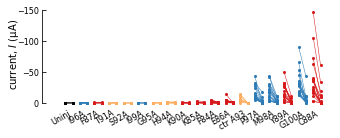

In [24]:
fig = plt.figure(figsize=(5.2, 1.9)) 

ax1 = plt.subplot(1,1,1)

#### common parameters
axesText = ''


# loop to plot paired data. Refers to List of Alanines and the before and after array
plotnr = np.array([1,2]) 
for n in range(int(len(df_newInuA_Bef_Alanine.columns)/2)):
    #print('plotting the lines')
    for i in range(len(df_newInuA_Bef_Alanine[ListofAllAlanin[n]+"-NaGluSelAmil300"])):
        ax1.plot(plotnr, [df_newInuA_Bef_Alanine[ListofAllAlanin[n]+"-NaGluSelAmil300"][i], df_newInuA_Bef_Alanine[ListofAllAlanin[n]+"+NaGluSelAmil300"][i]], c=colorsDelta[n],marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine,clip_on=False)# alpha=0.5
    plotnr = plotnr +2
    #print(plotnr)

ylimSetM4 = [0,-150]

##### AXIS 1 ####
ax1.set_ylim(ylimSetM4)
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)                                     # no spine at the top
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',1))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
# ax1.plot([-1,20], [0,0], 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax1.tick_params(axis='y', which='major', labelsize=AxisTickLabelSize )  
ax1.tick_params(axis='x', which='major', labelsize=AxisTickLabelSize, length=0) 
ax1.spines['bottom'].set_visible(False) 

labels2 = ['Uninj']
for i in range(0,len(LabelAlanin)):
    #labels2.append('')
    labels2.append(LabelAlanin[i])

#ax1.set_xticklabels(labels2,  ha='right',rotation=30,fontsize=AxisLegendSize)    
ax1.xaxis.set_visible(False)

n=1.9
for i in range(len(labels2)):    
    ax1.text(n, 20, labels2[i],ha='right',rotation=30,fontsize= AxisLegendSize)
    n = n+2

# plt.draw()      # Note, this line is important
# labels = [l.get_text() for l in ax1.get_yticklabels()]
# labels[0] = '0'
#ax1.set_yticklabels(labels)

#ax1.set_ylabel('Change in current @-85 mV (I(drug) - I(before)',fontsize=14)
ax1.set_ylabel(axesText)
ax1.set_xlabel(axesText)
ax1.text(-6, -120.5, 'current, $\it{I}$ (µA)',fontsize=AxisLabelSize,rotation=90,ha='center')
   
plt.gcf().subplots_adjust(bottom=0.2, left=0.15,right=None, top=None,hspace=None, wspace=None)     
      
plt.savefig(filedirExportFig+"PairedDataAllAlanineSingles"+'.pdf')

## chimera singles paired dot plot

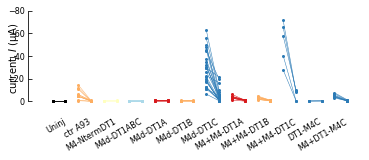

In [25]:
fig = plt.figure(figsize=(6, 2)) 

ax1 = plt.subplot(1,1,1)

#### common parameters
axesText = ''


# loop to plot paired data. Refers to List of Alanines and the before and after array
plotnr = np.array([1,2]) 
for n in range(int(len(df_newInuA_Bef_Chimera.columns)/2)):
    #print('plotting the lines')
    for i in range(len(df_newInuA_Bef_Chimera[ListofAllChimera[n]+"-NaGluSelAmil300"])):
        ax1.plot(plotnr, [df_newInuA_Bef_Chimera[ListofAllChimera[n]+"-NaGluSelAmil300"][i], df_newInuA_Bef_Chimera[ListofAllChimera[n]+"+NaGluSelAmil300"][i]], c=colorsDeltaChimera[n],marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine,clip_on=False)# alpha=0.5
    plotnr = plotnr +2


ylimSetM4 = [0,-80]

##### AXIS 1 ####
ax1.set_ylim(ylimSetM4)
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)                                     # no spine at the top
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',1))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
# ax1.plot([-1,20], [0,0], 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax1.tick_params(axis='y', which='major', labelsize=AxisTickLabelSize )  
ax1.tick_params(axis='x', which='major', labelsize=AxisTickLabelSize, length=0) 
# ax7.set_title('Ibuoride Analogues',size=12)
# ax1.set_xticklabels(np.unique(IbuAll30['Injection']),rotation=30)
#ax1.set_xticks((plot1[0],plot1[1], plot2[0],plot2[1], plot3[0], plot3[1],plot4[0],plot4[1],plot5[0],plot5[1])) 
ax1.spines['bottom'].set_visible(False) 


labels2 = ['','Uninj']
for i in range(0,len(LabelChimera)):
    #labels2.append('')
    labels2.append(LabelChimera[i])

#positioning of labels    
n=0.1
for i in range(len(labels2)):    
    ax1.text(n, 20, labels2[i],ha='right',rotation=30,fontsize= AxisLegendSize)
    n = n+2
       
#ax1.set_xticklabels(labels2,  ha='right',rotation=30,fontsize=AxisLegendSize)    
ax1.xaxis.set_visible(False)

# plt.draw()      # Note, this line is important
# labels = [l.get_text() for l in ax1.get_yticklabels()]
# labels[0] = '0'
#ax1.set_yticklabels(labels)

# #ax1.set_xlabel('V (mV)',fontsize=14)
# #ax1.set_ylabel('Change in current @-85 mV (I(drug) - I(before)',fontsize=14)
ax1.set_ylabel(axesText)
ax1.set_xlabel(axesText)
ax1.text(-2, -60.5, 'current, $\it{I}$ (µA)',fontsize=AxisLabelSize,rotation=90,ha='center')

    
plt.gcf().subplots_adjust(bottom=0.25, left=0.15,right=None, top=None,hspace=1.5, wspace=0.5)     
    
# plt.show()

plt.savefig(filedirExportFig+"PairedDataAllChimera"+'.pdf')

# plot Change in Current for Different conditions

# plot alanin delta

/Users/wormsenselab/anaconda3/envs/dabest/lib/python3.7/site-packages/dabest/_classes.py:534: UserWarning: The upper limit of the interval was in the top 10 values. The result should be considered unstable.
  stacklevel=1)
/Users/wormsenselab/anaconda3/envs/dabest/lib/python3.7/site-packages/seaborn/categorical.py:1243: RuntimeWarning: invalid value encountered in sqrt
  dx = np.sqrt(d ** 2 - dy ** 2) * 1.05


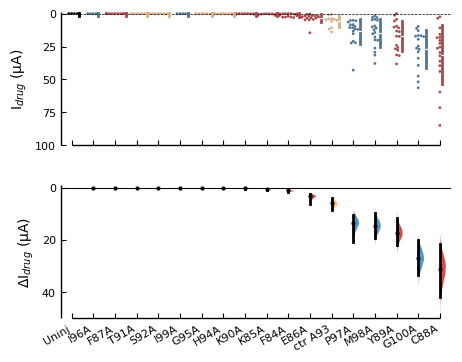

In [26]:
#plt.figure(figsize=(3.5, 3)) 
fig1= Fig_Delta_Alanin.mean_diff.plot(swarm_ylim=(100,-1), contrast_ylim=(50,-1), fig_size=(5.2, 4.5),  raw_marker_size=(2),es_marker_size=2,contrast_label='ΔI$_{drug}$ (µA)',
                                    swarm_label='I$_{drug}$ (µA)',custom_palette=colorsDelta, reflines_kwargs = {'linestyle':'dashed', 'linewidth':0.75})#,reflines_kwargs


fig1.axes[0].plot([-1,50], [0,0], 'k-', color='#000000', linestyle='--',linewidth=0.5)
#fig1.axes[1].plot([-1,20], [-1,-1], 'k--', color='#000000', linewidth=1)
fig1.axes[0].tick_params(axis='both', which='major', labelsize=AxisLegendSize)  
fig1.axes[1].tick_params(axis='both', which='major', labelsize=AxisLegendSize)  
fig1.axes[0].get_yaxis().set_tick_params(direction='in')
fig1.axes[1].get_yaxis().set_tick_params(direction='in')
fig1.axes[0].get_xaxis().set_tick_params(direction='in')
fig1.axes[1].get_xaxis().set_tick_params(direction='in')



labels = ['','']
fig1.axes[0].set_xticklabels(labels, rotation=30, ha='right')
# fig1.axes[0].text(0.13, -12.5, 'Ibu (µM)')
# fig1.axes[0].text(4.0, -12.5, 'Asp  (µM)')

labels2 = ['Uninj']
for i in range(0,len(LabelAlanin)):
    #labels2.append('')
    labels2.append(LabelAlanin[i])
                                                                                                       
#labels2 = ['',LabelAlanin[0],'','F84A','','K85A','','E86A','','F87A','','C88A','','Y89A','','K90A','','T91A','','S92A','','H94A','','G95A','','I96A','','P97A','','M98A','','I99A','','G100A']
fig1.axes[1].set_xticklabels(labels2, rotation=30, ha='right')

#plt.gcf().subplots_adjust(bottom=0.2, left=0.3,right=None, top=None,hspace=1.5, wspace=0.2) 
#plt.gcf().subplots_adjust(bottom=0.17, left=0.25,right=None, top=None,hspace=0.75, wspace=0.2) 
plt.gcf().subplots_adjust(bottom=0.2, left=0.15,right=None, top=None,hspace=None, wspace=None)  
plt.savefig(filedirExportFig+"ChangeinCurrentPilotAlanin-WithOutCurrent"+'.pdf')


# plot chimera Delta All singles

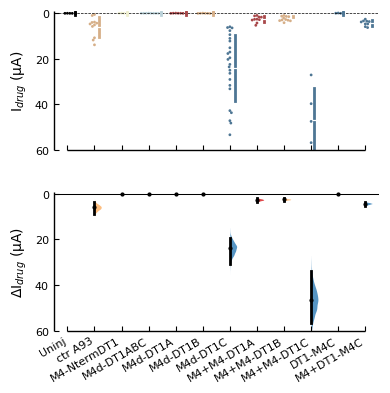

In [27]:
#plt.figure(figsize=(3.5, 3)) 
fig1= Fig_Delta_Chimera.mean_diff.plot(swarm_ylim=(60,-1), contrast_ylim=(60,-1), fig_size=(5, 4.5),  raw_marker_size=(2),es_marker_size=2,contrast_label='ΔI$_{drug}$ (µA)',
                                    swarm_label='I$_{drug}$ (µA)',custom_palette=colorsDeltaChimera, reflines_kwargs = {'linestyle':'dashed', 'linewidth':0.75})#,reflines_kwargs


fig1.axes[0].plot([-1,50], [0,0], 'k-', color='#000000', linestyle='--',linewidth=0.5)
#fig1.axes[1].plot([-1,20], [-1,-1], 'k--', color='#000000', linewidth=1)
fig1.axes[0].tick_params(axis='both', which='major', labelsize=AxisLegendSize)  
fig1.axes[1].tick_params(axis='both', which='major', labelsize=AxisLegendSize)  
fig1.axes[0].get_yaxis().set_tick_params(direction='in')
fig1.axes[1].get_yaxis().set_tick_params(direction='in')
fig1.axes[0].get_xaxis().set_tick_params(direction='in')
fig1.axes[1].get_xaxis().set_tick_params(direction='in')



labels = ['','']
fig1.axes[0].set_xticklabels(labels, rotation=30, ha='right')
# fig1.axes[0].text(0.13, -12.5, 'Ibu (µM)')
# fig1.axes[0].text(4.0, -12.5, 'Asp  (µM)')

labels2 = ['Uninj']
for i in range(0,len(LabelChimera)):
    #labels2.append('')
    labels2.append(LabelChimera[i])
                                                                                                       
#labels2 = ['',LabelAlanin[0],'','F84A','','K85A','','E86A','','F87A','','C88A','','Y89A','','K90A','','T91A','','S92A','','H94A','','G95A','','I96A','','P97A','','M98A','','I99A','','G100A']
fig1.axes[1].set_xticklabels(labels2, rotation=30, ha='right')

#plt.gcf().subplots_adjust(bottom=0.2, left=0.3,right=None, top=None,hspace=1.5, wspace=0.2) 
plt.gcf().subplots_adjust(bottom=0.17, left=0.25,right=None, top=None,hspace=0.75, wspace=0.2) 
plt.savefig(filedirExportFig+"ChangeinCurrentPilotChimera"+'.pdf')


In [35]:
filedirExportFig


'/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/AnalysisNterm/FiguresFromNotebook/'

# plot chimera delta heteromeric expression

# paired dot plot

# Quality CHECK Data

# Check Some Statistics about number of Recordings etc

In [28]:
df_Alanin300Amil.pivot(columns='Injection', values='TestSol').describe().T

,count,unique,top,freq
Injection,,,,
mg419mg012,11,1,NaGluSelAmil300,11
mg738mg012,22,1,NaGluSelAmil300,22
mg739mg012,15,1,NaGluSelAmil300,15
mg740mg012,17,1,NaGluSelAmil300,17
mg741mg012,10,1,NaGluSelAmil300,10
mg745mg012,10,1,NaGluSelAmil300,10
mg746mg012,6,1,NaGluSelAmil300,6
mg747mg012,4,1,NaGluSelAmil300,4
mg748mg012,18,1,NaGluSelAmil300,18


In [29]:
df_Chimera300Amil.pivot(columns='Injection', values='TestSol').describe().T

,count,unique,top,freq
Injection,,,,
mg419mg012,11,1,NaGluSelAmil300,11
mg419mg734mg012,10,1,NaGluSelAmil300,10
mg419mg735mg012,11,1,NaGluSelAmil300,11
mg419mg742mg012,5,1,NaGluSelAmil300,5
mg419mg758mg012,9,1,NaGluSelAmil300,9
mg733mg012,8,1,NaGluSelAmil300,8
mg734mg012,6,1,NaGluSelAmil300,6
mg735mg012,6,1,NaGluSelAmil300,6
mg742mg012,24,1,NaGluSelAmil300,24


# Control Rating

In [30]:
df_Alanin300Amil

,Date,CellIDRec,Injection,CultivationSol,DaysPostInj,Rating,StartSol,TestSol,MeanSTART,MeanTEST,DELTA,RATIO,VrevSTART,VrevTEST,DELTAVrev
8,갎,STFX100002,mg739mg012,L-15(300Amil),4,3.0,NaGluSel1,NaGluSelAmil300,-4.547313e-07,-8.221583e-08,3.725155e-07,0.180801,0.006131,-0.051760,-0.057891
10,갎,STFX100004,mg740mg012,L-15(300Amil),4,3.0,NaGluSel1,NaGluSelAmil300,-3.463728e-06,-1.080386e-07,3.355689e-06,0.031191,0.026640,-0.054522,-0.081162
12,갎,STFX100005,mg741mg012,L-15(300Amil),4,3.0,NaGluSel1,NaGluSelAmil300,-1.507910e-07,-1.565179e-07,-5.726877e-09,1.037979,-0.040769,-0.038976,0.001793
14,갎,STFX100007,mg419mg012,L-15(300Amil),4,3.0,NaGluSel1,NaGluSelAmil300,-1.443232e-05,-5.934352e-07,1.383889e-05,0.041118,0.002304,-0.040045,-0.042349
18,갎,STFX100009,mg741mg012,L-15(300Amil),4,3.0,NaGluSel1,NaGluSelAmil300,-1.715121e-07,-1.769133e-07,-5.401213e-09,1.031492,-0.039718,-0.039590,0.000128
20,갎,STFX100010,mg740mg012,L-15(300Amil),4,3.0,NaGluSel1,NaGluSelAmil300,-1.671314e-06,-1.606656e-07,1.510648e-06,0.096131,0.014279,-0.047649,-0.061928
22,갎,STFX100011,mg739mg012,L-15(300Amil),4,3.0,NaGluSel1,NaGluSelAmil300,-2.578013e-07,-7.150355e-08,1.862978e-07,0.277359,-0.028196,-0.071902,-0.043706
24,갎,STFX100012,mg738mg012,L-15(300Amil),4,3.0,NaGluSel1,NaGluSelAmil300,-1.083028e-07,-9.873043e-08,9.572399e-09,0.911614,-0.046417,-0.050520,-0.004102
26,갎,STFX100013,uninjected,L-15(300Amil),4,3.0,NaGluSel1,NaGluSelAmil300,-5.627146e-08,-8.125887e-08,-2.498741e-08,1.444051,-0.067629,-0.056333,0.011296
28,갏,STFX100016,mg740mg012,L-15(300Amil),5,3.0,NaGluSel1,NaGluSelAmil300,-1.479551e-05,-2.233541e-07,1.457216e-05,0.015096,0.000560,-0.055933,-0.056492


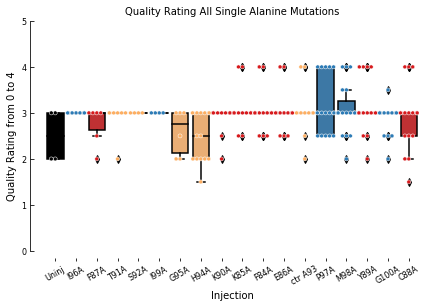

In [31]:
fig = plt.figure(figsize=(8, 4.5)) 
#plt.subplots(2, 2, sharex='col')
ax1 = plt.subplot(1,1,1)


orderCons = ListofAllAlanin #["uninjected","mg419mg012","mg738mg012","mg739mg012","mg740mg012","mg741mg012","mg748mg012","mg759mg012","mg745mg012","mg752mg012","mg749mg012","mg750mg012","mg746mg012","mg747mg012", "mg760mg012","mg753mg012","mg761mg012","mg751mg012"]

labels2 = ['Uninj']
#labels2 = []
for i in range(0,len(LabelAlanin)):
    #labels2.append('')
    labels2.append(LabelAlanin[i])
sns.swarmplot(x= df_Alanin300Amil['Injection'], y=df_Alanin300Amil['Rating'], data = df_Alanin300Amil,palette=colorsDelta, edgecolor='white', linewidth=0.5, ax = ax1, size = 4,order=orderCons)#order=["mg419mg012","pTL69mg012","mg418mg012","mg418mg419mg012"]
sns.boxplot(x= df_Alanin300Amil['Injection'], y=df_Alanin300Amil['Rating'], data = df_Alanin300Amil, palette=colorsDelta,ax=ax1,order=orderCons)

YlimitPerm = [0,5]

##### AXIS 1 ####
ax1.set_ylim(YlimitPerm)
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)  # no spine at the top
ax1.spines['bottom'].set_visible(False)  
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',15))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
#ax1.plot([-1,50], [0.2,0.2] , 'k--', color='#111111', linewidth=1) #gray line for Zero or 1   
#ax1.plot([-1,50], [1,1] , 'k-', color='#000000', linewidth=1)
#ax1.plot([-1,50], [0.2,0.2] , 'k--', color='#111111', linewidth=1) #gray line for Zero or 1     
ax1.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)  
ax1.set_title('Quality Rating All Single Alanine Mutations',size=AxisLabelSize) 
ax1.yaxis.label.set_size(20)
ax1.set_ylabel('Quality Rating from 0 to 4', fontsize=AxisLabelSize)

#ax1.xaxis.set_visible(False)
ax1.set_xticklabels(labels2,rotation=30)






plt.gcf().subplots_adjust(bottom=0.17, left=0.25,right=None, top=None,hspace=0.75, wspace=0.2) 

# plt.savefig(filedirExportFig+"PotassiumPermeabilityNtermAlaninWithCurrent"+'.pdf')




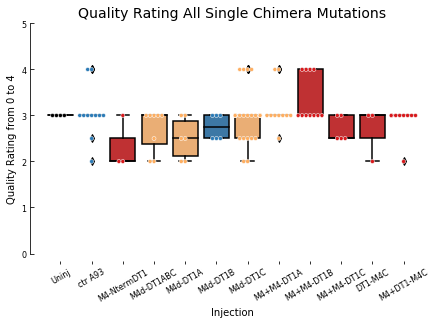

In [32]:
fig = plt.figure(figsize=(8, 4.5)) 
#plt.subplots(2, 2, sharex='col')
ax1 = plt.subplot(1,1,1)


orderCons = ListofAllChimera #["uninjected","mg419mg012","mg738mg012","mg739mg012","mg740mg012","mg741mg012","mg748mg012","mg759mg012","mg745mg012","mg752mg012","mg749mg012","mg750mg012","mg746mg012","mg747mg012", "mg760mg012","mg753mg012","mg761mg012","mg751mg012"]

labels2 = ['Uninj']
#labels2 = []
for i in range(0,len(LabelChimera)):
    #labels2.append('')
    labels2.append(LabelChimera[i])
    
sns.swarmplot(x= df_Chimera300Amil['Injection'], y=df_Chimera300Amil['Rating'], data = df_Chimera300Amil,palette=colorsDelta, edgecolor='white', linewidth=0.5, ax = ax1, size = 4,order=orderCons)#order=["mg419mg012","pTL69mg012","mg418mg012","mg418mg419mg012"]
sns.boxplot(x= df_Chimera300Amil['Injection'], y=df_Chimera300Amil['Rating'], data = df_Chimera300Amil, palette=colorsDelta,ax=ax1,order=orderCons)

YlimitPerm = [0,5]

##### AXIS 1 ####
ax1.set_ylim(YlimitPerm)
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)  # no spine at the top
ax1.spines['bottom'].set_visible(False)  
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',15))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
#ax1.plot([-1,50], [0.2,0.2] , 'k--', color='#111111', linewidth=1) #gray line for Zero or 1   
#ax1.plot([-1,50], [1,1] , 'k-', color='#000000', linewidth=1)
#ax1.plot([-1,50], [0.2,0.2] , 'k--', color='#111111', linewidth=1) #gray line for Zero or 1     
ax1.tick_params(axis='both', which='major', labelsize=8)  
ax1.set_title('Quality Rating All Single Chimera Mutations',size=14) 
ax1.yaxis.label.set_size(20)
ax1.set_ylabel('Quality Rating from 0 to 4', fontsize=10)

#ax1.xaxis.set_visible(False)
ax1.set_xticklabels(labels2,rotation=30)



plt.gcf().subplots_adjust(bottom=0.17, left=0.25,right=None, top=None,hspace=0.75, wspace=0.2) 

# plt.savefig(filedirExportFig+"PotassiumPermeabilityNtermAlaninWithCurrent"+'.pdf')




# Control Leak

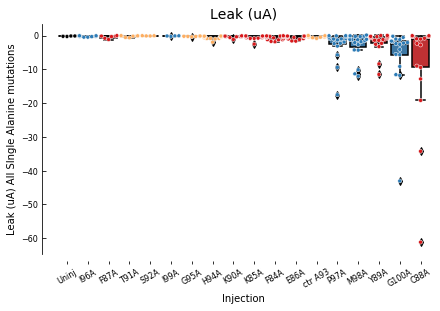

In [33]:
fig = plt.figure(figsize=(8, 4.5)) 
#plt.subplots(2, 2, sharex='col')
ax1 = plt.subplot(1,1,1)


orderCons = ListofAllAlanin #["uninjected","mg419mg012","mg738mg012","mg739mg012","mg740mg012","mg741mg012","mg748mg012","mg759mg012","mg745mg012","mg752mg012","mg749mg012","mg750mg012","mg746mg012","mg747mg012", "mg760mg012","mg753mg012","mg761mg012","mg751mg012"]

labels2 = ['Uninj']
#labels2 = []
for i in range(0,len(LabelAlanin)):
    #labels2.append('')
    labels2.append(LabelAlanin[i])
sns.swarmplot(x= df_Alanin300Amil['Injection'], y=df_Alanin300Amil['MeanTEST']*1000000, data = df_Alanin300Amil,palette=colorsDelta, edgecolor='white', linewidth=0.5, ax = ax1, size = 4,order=orderCons)#order=["mg419mg012","pTL69mg012","mg418mg012","mg418mg419mg012"]
sns.boxplot(x= df_Alanin300Amil['Injection'], y=df_Alanin300Amil['MeanTEST']*1000000, data = df_Alanin300Amil, palette=colorsDelta,ax=ax1,order=orderCons)

YlimitPerm = [1,-10]

##### AXIS 1 ####
#ax1.set_ylim(YlimitPerm)
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)  # no spine at the top
ax1.spines['bottom'].set_visible(False)  
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',15))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
#ax1.plot([-1,50], [0.2,0.2] , 'k--', color='#111111', linewidth=1) #gray line for Zero or 1   
#ax1.plot([-1,50], [1,1] , 'k-', color='#000000', linewidth=1)
#ax1.plot([-1,50], [0.2,0.2] , 'k--', color='#111111', linewidth=1) #gray line for Zero or 1     
ax1.tick_params(axis='both', which='major', labelsize=8)  
ax1.set_title('Leak (uA)',size=14) 
ax1.yaxis.label.set_size(20)
ax1.set_ylabel('Leak (uA) All SIngle Alanine mutations', fontsize=10)

#ax1.xaxis.set_visible(False)
ax1.set_xticklabels(labels2,rotation=30)



plt.gcf().subplots_adjust(bottom=0.17, left=0.25,right=None, top=None,hspace=0.75, wspace=0.2) 

# plt.savefig(filedirExportFig+"PotassiumPermeabilityNtermAlaninWithCurrent"+'.pdf')




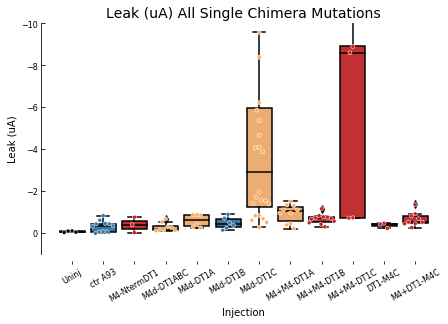

In [34]:
fig = plt.figure(figsize=(8, 4.5)) 
#plt.subplots(2, 2, sharex='col')
ax1 = plt.subplot(1,1,1)


orderCons = ListofAllChimera #["uninjected","mg419mg012","mg738mg012","mg739mg012","mg740mg012","mg741mg012","mg748mg012","mg759mg012","mg745mg012","mg752mg012","mg749mg012","mg750mg012","mg746mg012","mg747mg012", "mg760mg012","mg753mg012","mg761mg012","mg751mg012"]

labels2 = ['Uninj']
#labels2 = []
for i in range(0,len(LabelChimera)):
    #labels2.append('')
    labels2.append(LabelChimera[i])
    
sns.swarmplot(x= df_Chimera300Amil['Injection'], y=df_Chimera300Amil['MeanTEST']*1000000, data = df_Chimera300Amil,palette=colorsDelta, edgecolor='white', linewidth=0.5, ax = ax1, size = 4,order=orderCons)#order=["mg419mg012","pTL69mg012","mg418mg012","mg418mg419mg012"]
sns.boxplot(x= df_Chimera300Amil['Injection'], y=df_Chimera300Amil['MeanTEST']*1000000, data = df_Chimera300Amil, palette=colorsDelta,ax=ax1,order=orderCons)

YlimitPerm = [1,-10]

##### AXIS 1 ####
ax1.set_ylim(YlimitPerm)
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)  # no spine at the top
ax1.spines['bottom'].set_visible(False)  
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',15))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
#ax1.plot([-1,50], [0.2,0.2] , 'k--', color='#111111', linewidth=1) #gray line for Zero or 1   
#ax1.plot([-1,50], [1,1] , 'k-', color='#000000', linewidth=1)
#ax1.plot([-1,50], [0.2,0.2] , 'k--', color='#111111', linewidth=1) #gray line for Zero or 1     
ax1.tick_params(axis='both', which='major', labelsize=8)  
ax1.set_title('Leak (uA) All Single Chimera Mutations',size=14) 
ax1.yaxis.label.set_size(20)
ax1.set_ylabel('Leak (uA)', fontsize=10)

#ax1.xaxis.set_visible(False)
ax1.set_xticklabels(labels2,rotation=30)



plt.gcf().subplots_adjust(bottom=0.17, left=0.25,right=None, top=None,hspace=0.75, wspace=0.2) 

# plt.savefig(filedirExportFig+"PotassiumPermeabilityNtermAlaninWithCurrent"+'.pdf')


